In [2]:
data=pd.read_csv('Pokemon.csv')

In [1]:
#导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=data.drop('Total',axis=1)

In [4]:
data=data.set_index('#')

In [7]:
#修改索引名称,其实不该也行,我就是喜欢整洁(*^▽^*)
data.index.name=''

# 缺失值

In [29]:
#检查缺失值数量
data.isnull().sum()

Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

由此可以观察得出，Type2有386个缺失值

# 异常值

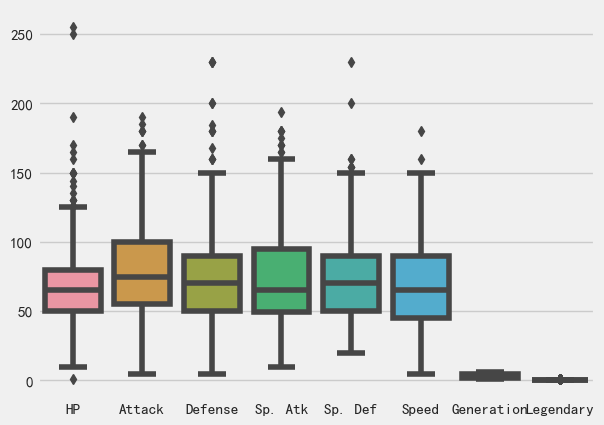

In [21]:
sns.boxplot(data=data)
plt.show()

由箱线图可以看出，存在异常值

# 平衡情况

查看Legendary占比

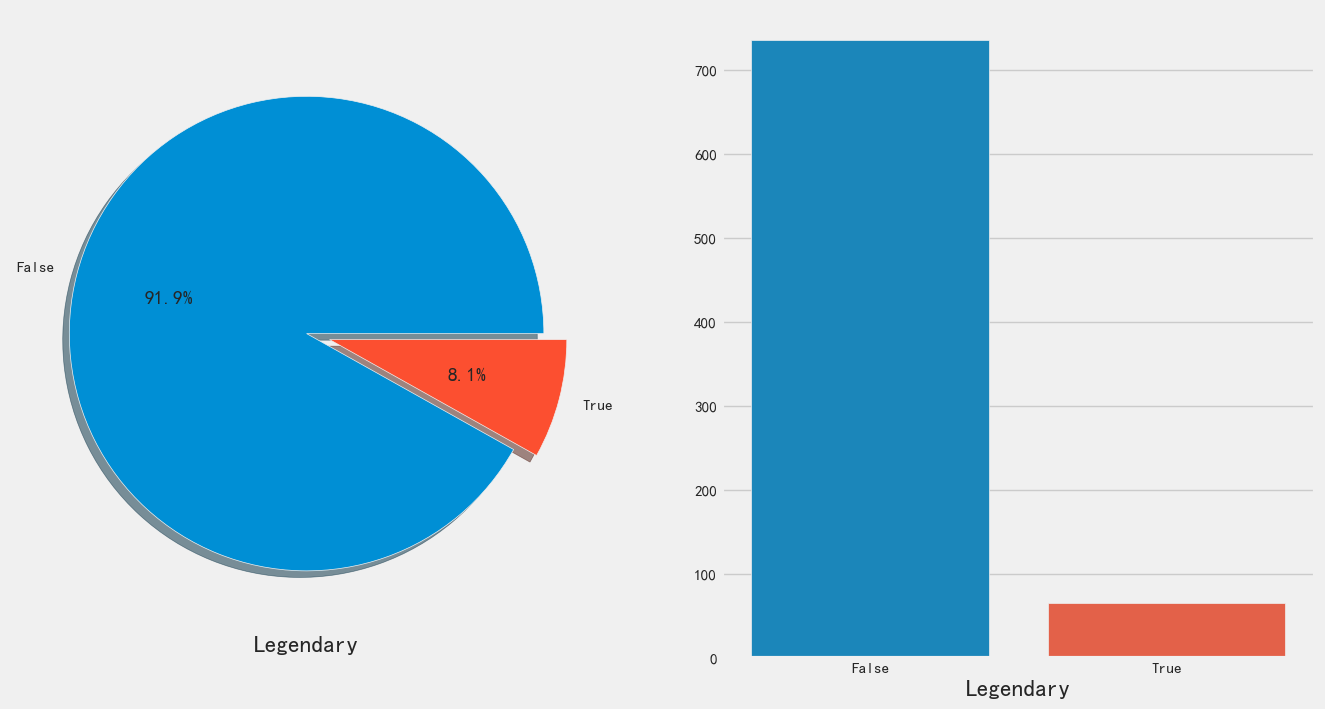

In [25]:
#神兽： 该精灵是否为神兽
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
f,ax=plt.subplots(1,2,figsize=(15,8))
data['Legendary'].value_counts().plot.pie(ax=ax[0],shadow=True,explode=[0,0.1],autopct='%1.1f%%')
ax[0].set_ylabel('')
ax[0].set_xlabel('Legendary')
sns.countplot(x='Legendary',data=data,ax=ax[1])#x=参数不可缺失
ax[1].set_ylabel('')
ax[1].set_xlabel('Legendary')
plt.show()

数据极不平衡，True远远小于False。

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [37]:
data.describe()

HP      Attack     Defense     Sp. Atk     Sp. Def       Speed   
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000  \
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500   
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474   
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000   
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000   
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000   
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000   
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000   

       Generation  
count   800.00000  
mean      3.32375  
std       1.66129  
min       1.00000  
25%       2.00000  
50%       3.00000  
75%       5.00000  
max       6.00000

叙述特征

In [38]:
data.describe(include=['O'])

Name Type 1  Type 2
count         800    800     414
unique        800     18      18
top     Bulbasaur  Water  Flying
freq            1    112      97

In [ ]:
分类特征

In [39]:
data.Generation.value_counts()

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

<Axes: xlabel='Type 1', ylabel='count'>

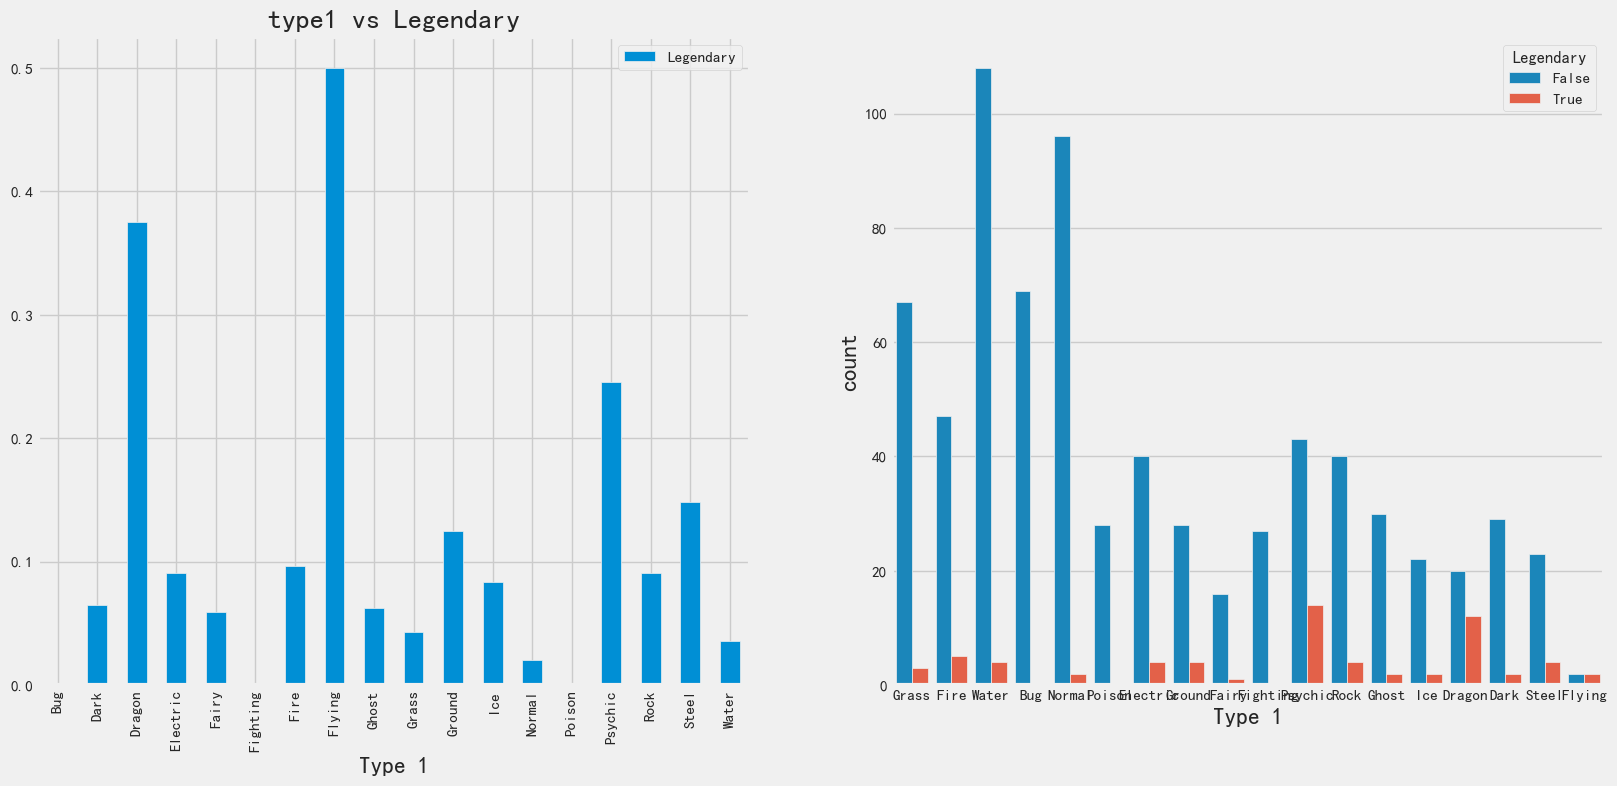

In [43]:
#属性1：每个口袋妖怪都有一个属性，这决定了他们的克制与被克制关系
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Type 1','Legendary']].groupby('Type 1').mean().plot.bar(ax=ax[0])
ax[0].set_title('type1 vs Legendary')
sns.countplot(x='Type 1',hue='Legendary',data=data,ax=ax[1])

In [44]:
data['Type 2'].fillna('empty',inplace=True)

<Axes: xlabel='Type 2', ylabel='count'>

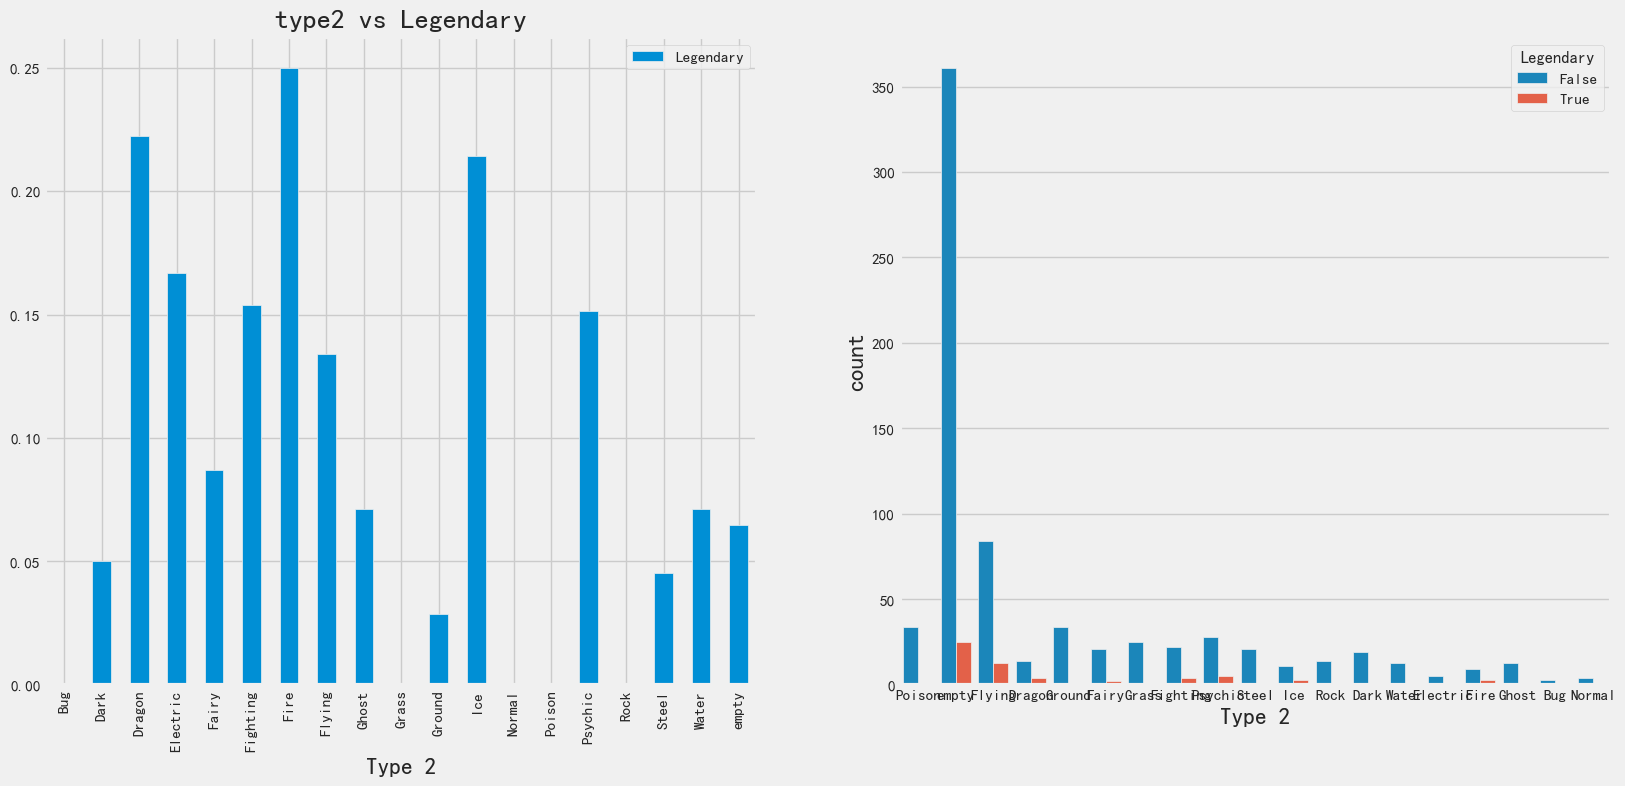

In [46]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Type 2','Legendary']].groupby('Type 2').mean().plot.bar(ax=ax[0])
ax[0].set_title('type2 vs Legendary')
sns.countplot(x='Type 2',hue='Legendary',data=data,ax=ax[1])

type2缺失数据太多,移除

序数特征分析

In [47]:
pd.crosstab(data.Generation,data.Legendary,margins=True).style.background_gradient(cmap='summer_r')

第三代神兽比例:  0.11
第四代神兽比例:  0.11
第五代神兽比例:  0.09
第六代神兽比例:  0.1


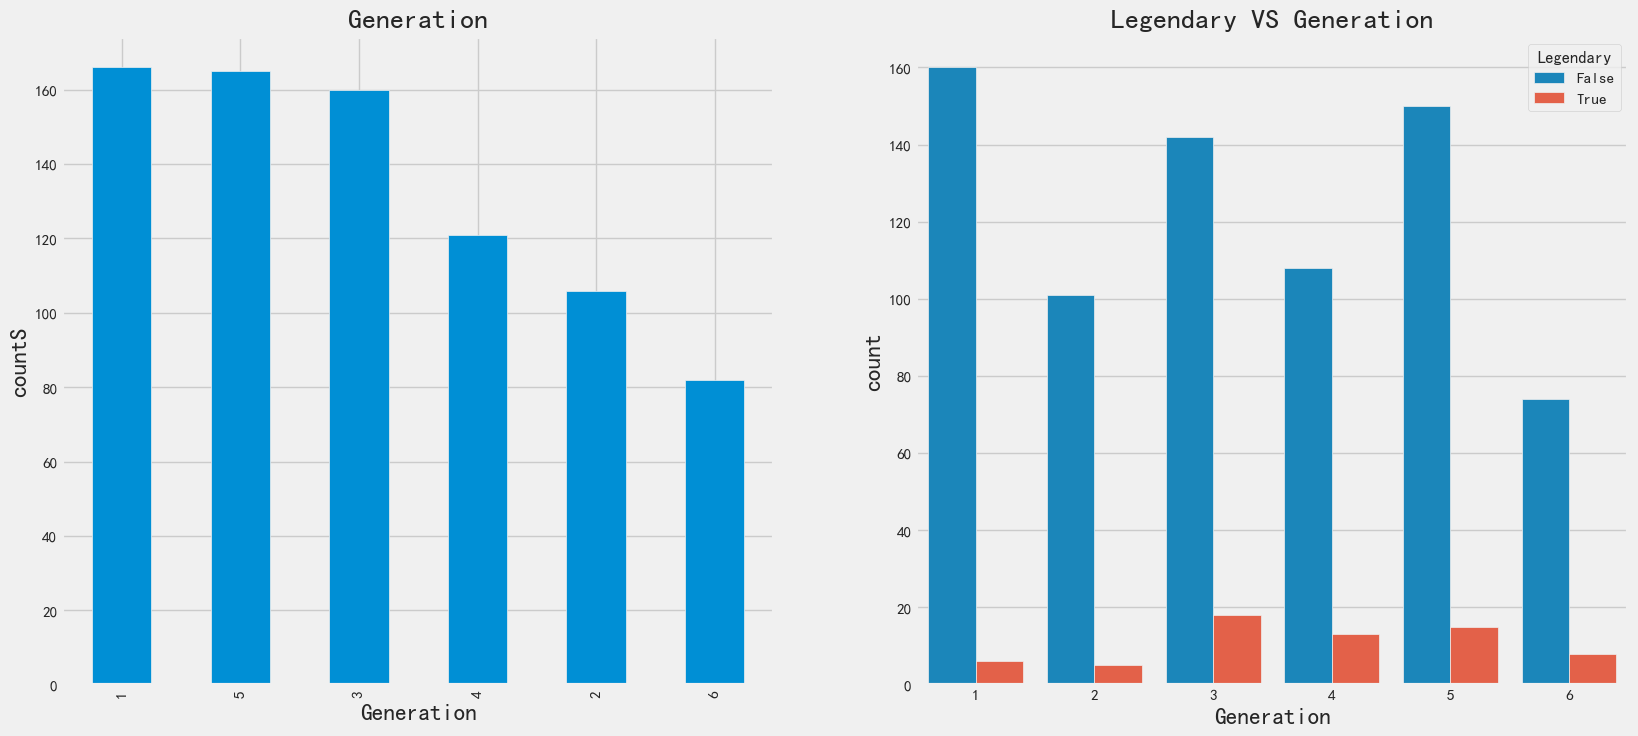

In [49]:
plt.rcParams['font.sans-serif']=['SimHei']
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Generation'].value_counts().plot.bar(ax=ax[0])
ax[0].set_ylabel('countS')
ax[0].set_title('Generation')
sns.countplot(x='Generation',hue='Legendary',data=data,ax=ax[1])
ax[1].set_title('Legendary VS Generation')
print("第三代神兽比例: ", round(18/160,2))
print("第四代神兽比例: ", round(13/121,2))
print("第五代神兽比例: ", round(15/165,2))
print("第六代神兽比例: ", round(8/82,2))

在第三,四,五代出现神兽的比例较高,分别为11%,11%,9%

# 连续性

not Legendary HP: 60
Legendary HP: 100


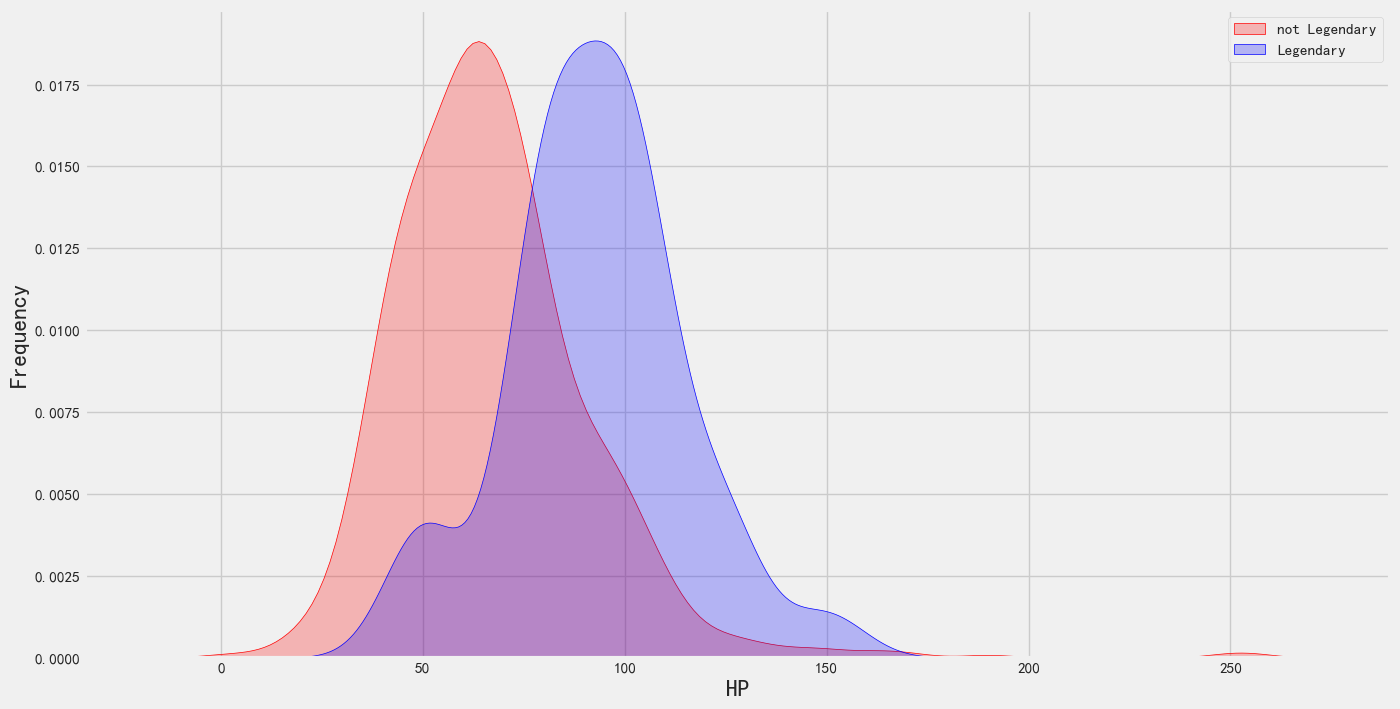

In [58]:
plt.figure(figsize=(15,8))
g = sns.kdeplot(data["HP"][data["Legendary"] == False], color="Red", shade = True)
g = sns.kdeplot(data["HP"][data["Legendary"] == True], ax =g, color="Blue", shade= True)
g.set_xlabel("HP")
g.set_ylabel("Frequency")
g = g.legend(["not Legendary","Legendary"])
print('not Legendary HP:',data["HP"][data["Legendary"] == 0].value_counts().index[0])
print('Legendary HP:',data["HP"][data["Legendary"] == 1].value_counts().index[0])

神兽的HP高.HP(在被击倒之前宠物小精灵可以承受的伤害)100为神兽,HP主要在60左右基本为非神兽